# Structure Inside Argon Plated MCM-41 Nanopores

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import pi as π
from scipy.constants import hbar as ħ
from scipy.constants import k as kb
from collections import defaultdict

# local modules
import include.colors as colortools
import include.helium as helium
from include.pimchelp import PIMCResults

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('./include/notebook.mplstyle')

## Parameters

In [2]:
T = np.array([1.6,4.2]) #K
τ = 0.004 # (1/K)
L = 50 # Å
Ro = 15.51 # Å
Ri = Ro - 3.71 # Å
P0 = helium.pressure_SVP(T)

## Grab, Process and Load Results

In [ ]:
%run /Users/adelmaes/Documents/UVM/Projects/SCRIPTS/reduce-one.py -r u -T 1.6 -L 50 -t 0.004 ../../../Data/Nanopores/
%run /Users/adelmaes/Documents/UVM/Projects/SCRIPTS/reduce-one.py -r u -T 4.2 -L 50 -t 0.004 ../../../Data/Nanopores/

### A key for temperature

In [3]:
def Tkey(T):
    return f'T = {T:3.1f} K'

### Chemical Potential vs. Reduced Pressure

In [4]:
x = np.logspace(-6,1,10000)
#x = np.linspace(1E-16,1,10000)


μ_exp = {}
for i,cT in enumerate(T):
    μ_exp[Tkey(cT)] = helium.chemical_potential(x*P0[i],T[i])

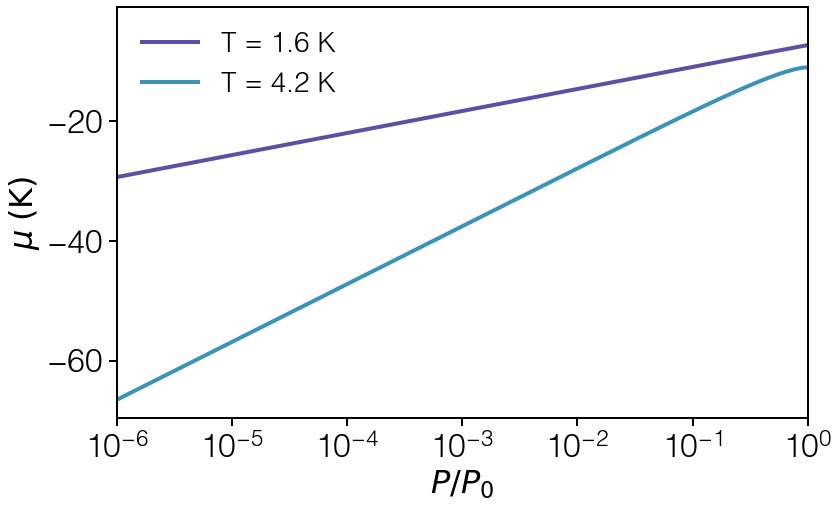

In [5]:
for i,cT in enumerate(T):
    plt.plot(x,μ_exp[Tkey(cT)], label=Tkey(cT))

#plt.yscale('symlog')
plt.xscale('log')
plt.ylabel(r'$\mu\; (\mathrm{K})$')
plt.xlabel(r'$P/P_0$')
plt.xlim(1E-6,1.01)
plt.legend()

In [ ]:
T[0]

In [ ]:
np.savez("data/chemical_potential_vs_pressure",P_P0=x,T=T,chemical_potential_T0=μ_exp[Tkey(T[0])],chemical_potential_T1=μ_exp[Tkey(T[1])])

## Investigate the Filling of the Pore

In [ ]:
path1 = '../../../Data/Nanopores/estimator-u-reduce-T-{:06.3f}-t-0.00400-L-050.000.dat'.format(cT)

In [ ]:
path1

In [ ]:
!wc -l  $path1

In [6]:
est = {}
x = {}
for i,cT in enumerate(T):
    est[Tkey(cT)] = PIMCResults('../../../Data/Nanopores/estimator-u-reduce-T-{:06.3f}-t-0.00400-L-050.000.dat'.format(cT))
    μ = est[Tkey(cT)].data['u']
    x[Tkey(cT)] = helium.pressure(est[Tkey(cT)].data['u'],cT)/helium.pressure_SVP(cT)

colors = colortools.get_linear_colors('Spectral',len(μ),reverse=False)
Tcolors = {Tkey(T[0]):colors[-10],Tkey(T[1]):colors[10]}

Text(0.5, 0, '$P/P_0$')

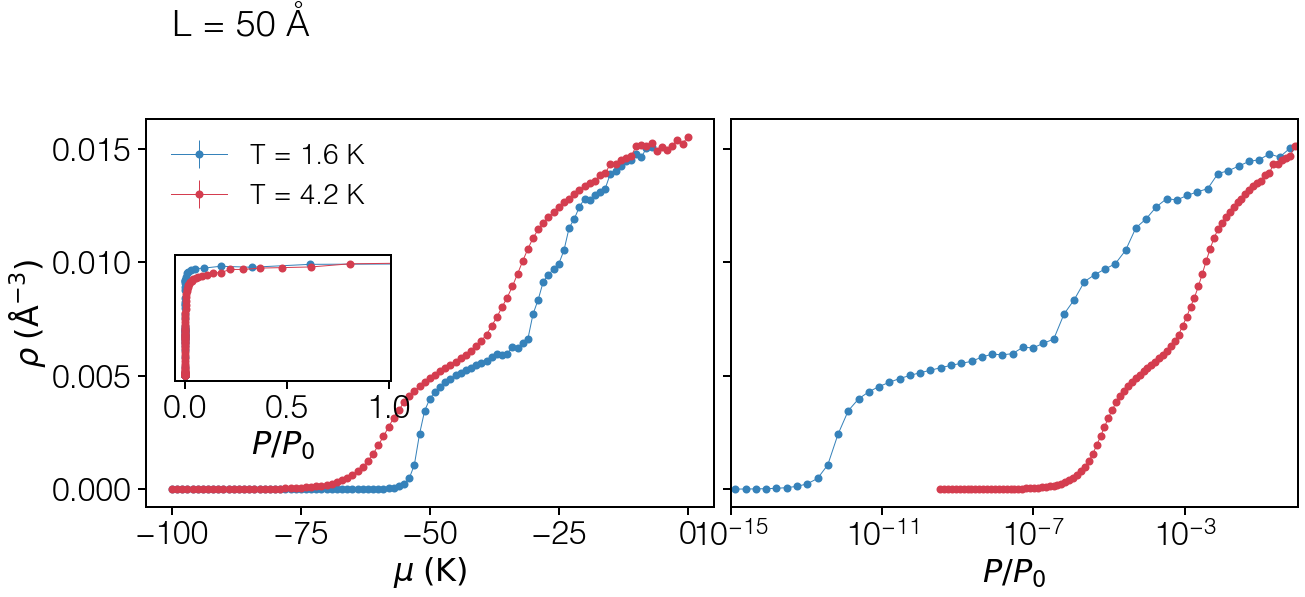

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,2,sharex=False, sharey=True, squeeze=True, figsize=(10,3.5))
fig.subplots_adjust(wspace=0.03)

for i,cT in enumerate(T):
    cest = est[Tkey(cT)]
    axes[0].errorbar(cest.data['u'],cest.data['density'],yerr=cest.data['Δdensity'], 
                     marker='o', color=Tcolors[Tkey(cT)], markersize=3,lw=0.5, label=Tkey(cT))

    axes[1].errorbar(x[Tkey(cT)],cest.data['density'],yerr=cest.data['Δdensity'], color=Tcolors[Tkey(cT)],
                     marker='o', markersize=3,lw=0.5)

# inset
#axins = inset_axes(axes[0], width="35%", height="25%", loc='lower right', borderpad=3)
axins = plt.axes([0.17, .4, .15, .25])
for i,cT in enumerate(T):
    axins.errorbar(x[Tkey(cT)],est[Tkey(cT)].data['density'],yerr=est[Tkey(cT)].data['Δdensity'], 
                   color=Tcolors[Tkey(cT)],marker='o', markersize=3, lw=0.5)

axins.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axins.set_yticks([])
axins.set_xlim(-0.05,1.01)
axins.set_xlabel(r'$P/P_0$')

axes[0].text(-100,0.02,'L = {:d} Å'.format(L),fontsize=18)
axes[0].legend(loc='upper left')
axes[0].set_xlabel(r'$\mu\; (\mathrm{K})$')
axes[0].set_ylabel(r'$\rho\; (\mathrm{\AA}^{-3})$')    
axes[1].set_xscale('log')
axes[1].set_xlim(1E-15,1)
axes[1].set_xlabel(r'$P/P_0$')
#plt.savefig('../Output/rho_vs_mu_and_PoP0.png',dpi=300)

## QFS Talk

In [8]:
import colors as colortools
colors_spec = colortools.get_linear_colors('Spectral',8,reverse=False)
black = "#646362"

0.99170068


(0, 0.018)

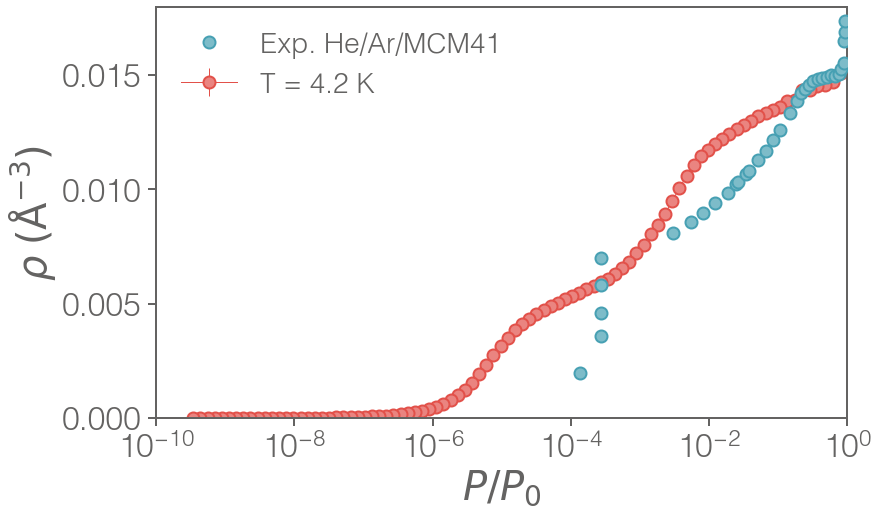

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
fig.subplots_adjust(wspace=0.03)

for i,cT in enumerate(T[-1:]):
    cest = est[Tkey(cT)]
    axes.errorbar(x[Tkey(cT)],cest.data['density'],yerr=cest.data['Δdensity'],
                     marker='o', mec=colors_spec[1], markersize=6,lw=0.5, label=Tkey(cT),
                     ecolor=colors_spec[1], color=colors_spec[1], mfc=colortools.get_alpha_hex(colors_spec[1],0.7))


axes.set_xlabel(r'$P/P_0$', color=black, fontsize=20)
axes.set_ylabel(r'$\rho\; (\mathrm{\AA}^{-3})$', color=black, fontsize=20)  



# Load experimental data from disk and rescale
isotherm = {}
isotherm['He/Ar/MCM41'] = np.loadtxt('../Data/Sokol_He_Ar_MCM41_Isotherm.dat')

max_exp = isotherm['He/Ar/MCM41'][-6,1]
max_qmc = np.max(cest.data['density'])
scale = max_qmc/max_exp

print(np.max(isotherm['He/Ar/MCM41'][:,0]))
cx = isotherm['He/Ar/MCM41'][:,0]

axes.plot(cx,isotherm['He/Ar/MCM41'][:,1]*scale,
                     marker='o', mec=colors_spec[-2], markersize=6,lw=0.0, label='Exp. He/Ar/MCM41',
                     mfc=colortools.get_alpha_hex(colors_spec[-2],0.7),zorder=10)

# axes.plot(cx[-19],isotherm['He/Ar/MCM41'][-19,1]*scale,
#                      marker='o', mec=colors_spec[5], markersize=12,lw=0.0, label='Exp. He/Ar/MCM41',
#                      mfc=colortools.get_alpha_hex(colors_spec[5],0.7),zorder=10)

l = axes.legend(loc='upper left')
for text in l.get_texts():
    text.set_color(black)
l.get_title().set_color(black)

[axes.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
axes.xaxis.label.set_color(black)
axes.tick_params(which='both', colors=black)

axes.set_xscale('log')
axes.set_xlim(1E-10,1)
axes.set_ylim(0,0.018)

#plt.savefig('../Output/QFS2019/qmc_rho_vs_P.pdf')
#plt.savefig('../Output/QFS2019/qmc_rho_vs_P_with_exp.pdf')

## Look at the Radial Density

In [10]:
radρ = {}
for cT in T:
    radρ[Tkey(cT)] = PIMCResults('../../../Data/Nanopores/radial-u-reduce-T-{:06.3f}-t-0.00400-L-050.000.dat'.format(cT))

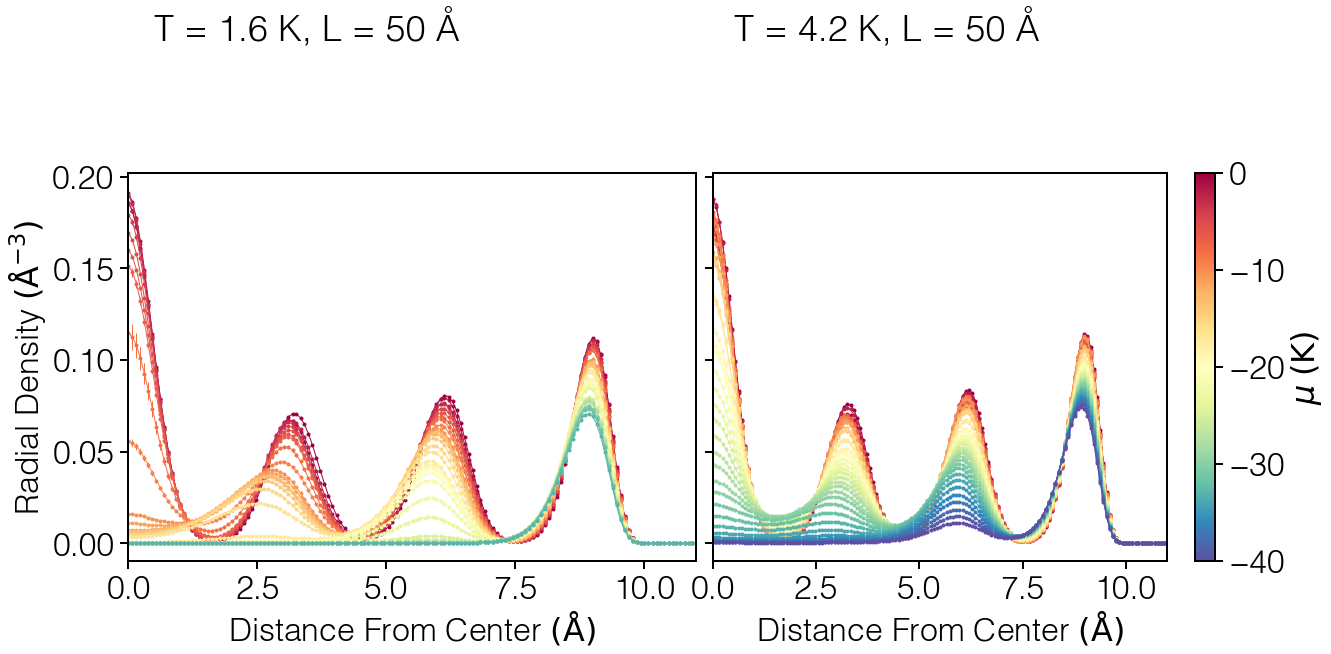

In [11]:
fig, axes = plt.subplots(1,2,sharex=False, sharey=True, squeeze=True, figsize=(10,3.5))
fig.subplots_adjust(wspace=0.03)
μmin = -40
colors2 = colortools.get_linear_colors('Spectral',len(μ[μ>μmin]),reverse=False)

for i,cT in enumerate(T):
    for j,param in enumerate(radρ[Tkey(cT)].params):
        if float(param.split('=')[-1]) > μmin:
            axes[i].errorbar(*radρ[Tkey(cT)].epdata(param), marker='o', lw=0.5, ms=1,
                     color=colors2[j], label=r'$\mu={:f}$'.format(μ[j]))

    axes[i].text(0.5,0.275,'T = {:3.1f} K, L = {:d} Å'.format(cT,L),fontsize=18)
    axes[i].set_xlabel(r'Distance From Center $(\mathrm{\AA})$')
    axes[i].set_xlim(0,11);
    axes[i].xaxis.set_major_locator(ticker.MultipleLocator(2.5))

axes[0].set_ylabel(r'Radial Density $(\mathrm{\AA}^{-3})$')

# create the colorbar
sm = plt.cm.ScalarMappable(cmap=mpl.cm.Spectral_r, norm=plt.Normalize(vmin=μ[0], vmax=μmin))
sm._A = []
plt.colorbar(sm, label=r'$\mu\; (\mathrm{K})$')
#plt.savefig('../Output/rho_vs_r.png',dpi=300)

## QFS 2019

[None, None, None, None, None, None, None, None, None, None, None, None]

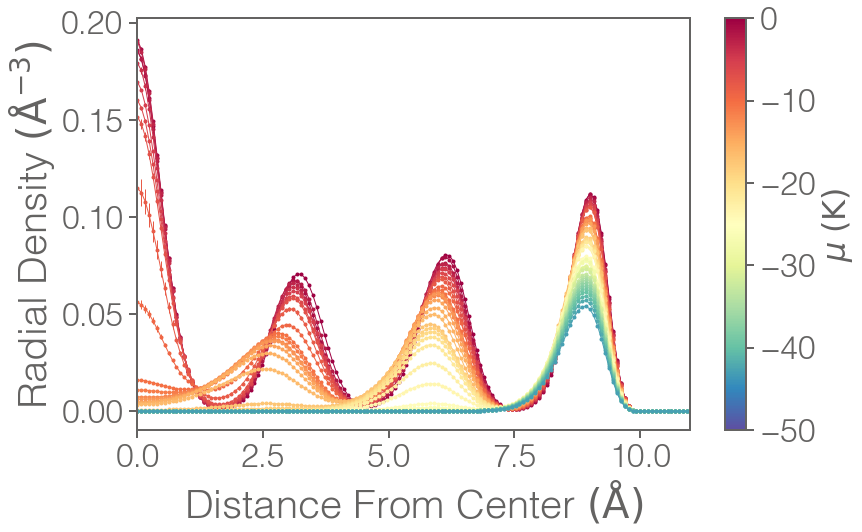

In [12]:
fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
μmin = -50
colors2 = colortools.get_linear_colors('Spectral',len(μ[μ>μmin]),reverse=False)

for i,cT in enumerate(T[:1]):
    for j,param in enumerate(radρ[Tkey(cT)].params):
        if float(param.split('=')[-1]) > μmin:
            axes.errorbar(*radρ[Tkey(cT)].epdata(param), marker='o', lw=0.5, ms=1,
                     color=colors2[j], label=r'$\mu={:f}$'.format(μ[j]))

axes.set_xlabel(r'Distance From Center $(\mathrm{\AA})$', fontsize=20, color=black)
axes.set_xlim(0,11);
axes.xaxis.set_major_locator(ticker.MultipleLocator(2.5))
[axes.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
axes.xaxis.label.set_color(black)
axes.tick_params(which='both', colors=black)

axes.set_ylabel(r'Radial Density $(\mathrm{\AA}^{-3})$', fontsize=20, color=black)

# create the colorbar
sm = plt.cm.ScalarMappable(cmap=mpl.cm.Spectral_r, norm=plt.Normalize(vmin=μ[0], vmax=μmin))
sm._A = []
cb = plt.colorbar(sm)
cb.set_label(r'$\mu\; (\mathrm{K})$', color=black)

# set colorbar tick color
cb.ax.yaxis.set_tick_params(color=black)
# set colorbar edgecolor 
cb.outline.set_edgecolor(black)
# set colorbar ticklabels
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=black)

#plt.savefig(f'../Output/QFS2019/qmc_radial_density.pdf')


#plt.savefig('../Output/rho_vs_r.png',dpi=300)

SystemError: <built-in method write of _io.BufferedWriter object at 0x131eb5e950> returned a result with an error set

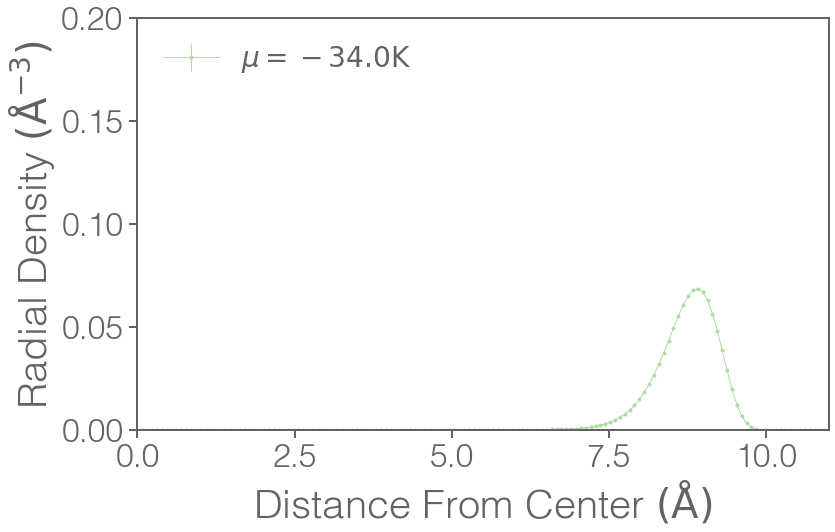

In [13]:
μmin = -50
colors2 = colortools.get_linear_colors('Spectral',len(μ[μ>μmin]),reverse=False)
num = len(radρ[Tkey(cT)].params[:])
for i,cT in enumerate(T[:1]):
    for j,param in enumerate(radρ[Tkey(cT)].params[:]):
        if float(param.split('=')[-1]) > μmin:
            fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
            fig.subplots_adjust(wspace=0.03)
            axes.errorbar(*radρ[Tkey(cT)].epdata(param), marker='o', lw=0.5, ms=1,
                     color=colors2[j], label=r'$\mu={:6.1f} \mathrm{{K}}$'.format(μ[j]))

            axes.set_xlabel(r'Distance From Center $(\mathrm{\AA})$', fontsize=20, color=black)
            axes.set_xlim(0,11);
            axes.xaxis.set_major_locator(ticker.MultipleLocator(2.5))

            axes.set_ylabel(r'Radial Density $(\mathrm{\AA}^{-3})$', color=black, fontsize=20)
            l = axes.legend(loc='upper left')
            for text in l.get_texts():
                text.set_color(black)
            l.get_title().set_color(black)

            [axes.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
            axes.set_ylim(0,0.2)
            axes.xaxis.label.set_color(black)
            axes.tick_params(which='both', colors=black)
            plt.savefig(f'../Output/QFS2019/qmc_radial_density_{num-j:03d}.png', dpi=300)
            plt.close(fig)


# create the colorbar
#sm = plt.cm.ScalarMappable(cmap=mpl.cm.Spectral_r, norm=plt.Normalize(vmin=μ[0], vmax=μmin))
#sm._A = []
#plt.colorbar(sm, label=r'$\mu\; (\mathrm{K})$')
#plt.savefig('../Output/rho_vs_r.png',dpi=300)

## The Linear Density and Coverage Inside the Pore

In [14]:
from scipy import integrate
from scipy.signal import argrelextrema

In [17]:
radρ[Tkey(cT)].params[20]

'u = -27.00'

In [18]:
data = radρ[Tkey(cT)].epdata(radρ[Tkey(cT)].params[0])
idx = argrelextrema(data[1], np.less)[0]
print(data[0][idx])

[1.706 4.575 7.522]


In [19]:
ρlin = {} 
coverage = defaultdict(list)

for cT in T:
    ρlin[Tkey(cT)] = np.zeros([len(μ),3])
    
    # find the location of the minima
    data = radρ[Tkey(cT)].epdata(radρ[Tkey(cT)].params[0])
    idx = argrelextrema(data[1], np.less)[0]
    rmin = data[0][idx]
    #rmin[0] = 1.25

    for i,param in enumerate(radρ[Tkey(cT)].params):
        # find the location of the first minimum
        r = radρ[Tkey(cT)].x(param)
        ρr = radρ[Tkey(cT)].y(param)
        min_idx = np.where(r>rmin[0])[0][0] 
        #min_idx = argrelextrema(ρr, np.less)[0][0]
        
        min_r = r[min_idx]
        
        ρlin[Tkey(cT)][i][0] = integrate.simps(r[:min_idx]*ρr[:min_idx],r[:min_idx])*2*π

        min_idx = np.where(r>rmin[1])[0][0]
        min_r = r[min_idx]
        ρlin[Tkey(cT)][i][1] = integrate.simps(r[:min_idx]*ρr[:min_idx],r[:min_idx])*2*π 

        min_idx = np.where(r>rmin[2])[0][0]
        min_r = r[min_idx]
        ρlin[Tkey(cT)][i][2] = integrate.simps(r[:min_idx]*ρr[:min_idx],r[:min_idx])*2*π 
        
        if i == 0:
            for j in range(len(rmin)-1):
                min_idx_1 = np.where(r>rmin[j])[0][0] 
                min_idx_2 = np.where(r>rmin[j+1])[0][0] 
                max_idx = argrelextrema(ρr[min_idx_1:min_idx_2], np.greater)[0][-1]
                A = integrate.simps(r[min_idx_1:min_idx_2]*ρr[min_idx_1:min_idx_2],r[min_idx_1:min_idx_2]) / r[min_idx_1+max_idx]
                coverage[Tkey(cT)].append(A)

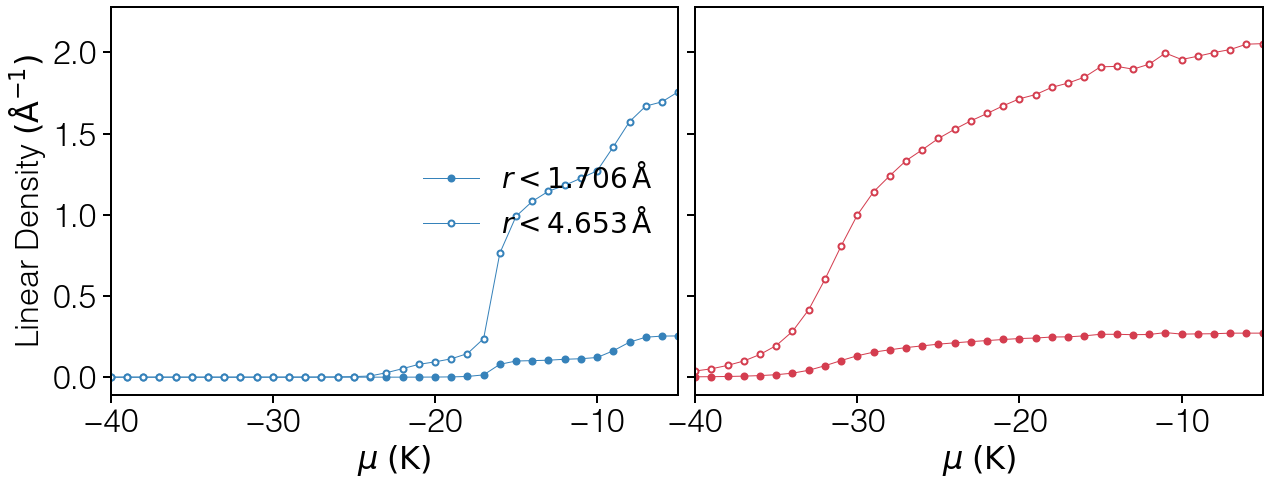

In [20]:
fig, axes = plt.subplots(1,2,sharex=False, sharey=True, squeeze=True, figsize=(10,3.5))
fig.subplots_adjust(wspace=0.03)

for i,cT in enumerate(T):
    axes[i].plot(μ,ρlin[Tkey(cT)][:,0],marker='o', color=Tcolors[Tkey(cT)], markersize=3, lw=0.5, 
                 label=rf'$r < {rmin[0]:.3f}\, \mathrm{{\AA}}$')
    axes[i].plot(μ,ρlin[Tkey(cT)][:,1],marker='o', color=Tcolors[Tkey(cT)], mfc='w', markersize=3, lw=0.5, 
                 label=rf'$r < {rmin[1]:.3f}\, \mathrm{{\AA}}$')
    
    #axes[i].text(-88,2.75,'T = {:4.1f} K, L = {:d} Å'.format(cT,L),fontsize=18)


#plt.plot(μ,ρlin[:,2],marker='o', markersize=3, lw=0.5, label=r'$r < 7.5\, \mathrm{\AA}$')

    axes[i].set_xlim(-40,-5)

    axes[i].set_xlabel(r'$\mu\; (\mathrm{K})$')

axes[0].set_ylabel(r'Linear Density $(\mathrm{\AA}^{-1})$')
axes[0].legend(loc='center right', frameon=False)
#plt.savefig('../Output/rholinear_vs_r.png',dpi=300)

## QFS 2019

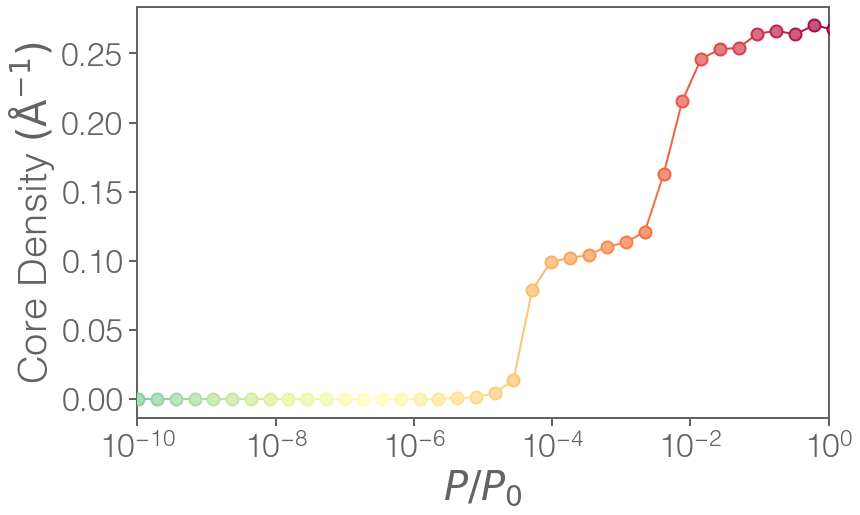

In [21]:
fig, axes = plt.subplots(1,1,sharex=False, sharey=True, squeeze=True)
colors2 = colortools.get_linear_colors('Spectral',len(μ[μ>μmin]),reverse=False)


for i,cT in enumerate(T[:1]):
    for j,param in enumerate(radρ[Tkey(cT)].params):
        if float(param.split('=')[-1]) > μmin:
            axes.plot(x[Tkey(cT)][j],ρlin[Tkey(cT)][j,0],lw=1, marker='o', mec=colors2[j], markersize=6,
                     mfc=colortools.get_alpha_hex(colors2[j],0.7),zorder=10)
            
            axes.plot(x[Tkey(cT)][j-1:j+1],ρlin[Tkey(cT)][j-1:j+1,0],lw=1, marker='None', linestyle='-', color=colors2[j])
   
    #axes.set_xlim(-40,-5)

    axes.set_xlabel(r'$P/P_0$', color=black, fontsize=20)

    [axes.spines[sp].set_color(black) for sp in ['bottom','top','left','right']]
    axes.xaxis.label.set_color(black)
    axes.tick_params(which='both', colors=black)

    axes.set_xscale('log')
    axes.set_xlim(1E-10,1)
    #axes.set_ylim(0,0.018)

    axes.set_ylabel(r'Core Density $(\mathrm{\AA}^{-1})$', color=black, fontsize=20)
#plt.savefig('../Output/QFS2019/rholinear_vs_P.pdf')

## Coverage near the walls

In [ ]:
idx = [Tkey(cT) for cT in T]

for j in range(3):
    print('|-')
    print('|{:d}'.format(4-j))
    for i in range(2):
        print('|{:6.4f}'.format(coverage[idx[i]][j]))
print('|}')

## The Wall Potential

In [ ]:
data = np.loadtxt('/Users/agdelma/Documents/UVM/Projects/PIMC/OUTPUT/gce-debug-02.000-010.000--011.000-0.04000-421fb4f8-d36a-46b4-95e5-0c38c693a3cb.dat')

In [ ]:
plt.plot(data[:,0],data[:,1])
cdata = -radρ[Tkey(1.6)].y(radρ[Tkey(1.6)].params[0])/np.max(radρ[Tkey(1.6)].y(radρ[Tkey(1.6)].params[0]))*np.min(data[:,1]) + np.min(data[:,1])
plt.fill_between(radρ[Tkey(1.6)].x(radρ[Tkey(1.6)].params[0]),np.min(data[:,1]),cdata, color='gray', alpha=0.1)
plt.xlim(0,10.5)
plt.ylim(np.min(data[:,1]),50)
plt.text(0.3,-350,r'$\mu=-7\; \mathrm{K}$', color='gray', fontsize=18)
plt.xlabel(r'Distance From Center $(\mathrm{\AA})$')
plt.ylabel(r'Adsorption Potential  $(\mathrm{K})$');
plt.savefig('../Output/V_vs_r.png',dpi=300)

## Superfluid Density

In [ ]:
a = 10
print(f'k)


In [ ]:
ρs = PIMCResaults('../../../Data/Nanopores/super-u-reduce-T-01.600-t-0.00400-L-050.000.dat')

In [ ]:
plt.plot(ρs.data['u'],ρs.data['rho_s/rho'],marker='o', markersize=3, lw=0.5)
plt.xlabel(r'$\mu\; (\mathrm{K})$')
plt.ylabel(r'$\rho_s/\rho$');